In [161]:
#Required imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [162]:
#Read the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Data Preprocessing/Analysis

In [149]:
#View the format of the data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [150]:
#View data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [163]:
#Define dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [164]:
#Scale the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [165]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Artificial Neural Network

In [166]:
#Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, restore_best_weights = True)

#Build the model
model = Sequential()
#Add the hidden layers
model.add(Dense(16, input_dim = 12, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'uniform'))
#model.add(Dropout(0.25))
model.add(Dense(4, activation = 'relu', kernel_initializer = 'uniform'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))

#Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, callbacks = [early_stopping], batch_size = 32)

Epoch 1/100
7/7 [==============================] - 1s 62ms/step - loss: 0.6926 - accuracy: 0.6603 - val_loss: 0.6919 - val_accuracy: 0.6889
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.6746 - val_loss: 0.6907 - val_accuracy: 0.6889
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.6746 - val_loss: 0.6894 - val_accuracy: 0.6889
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.6746 - val_loss: 0.6881 - val_accuracy: 0.6889
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.6746 - val_loss: 0.6869 - val_accuracy: 0.6889
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6746 - val_loss: 0.6855 - val_accuracy: 0.6889
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.6746 - val_loss: 0.6840 - val_accuracy: 0.6889
Epoch 8/100
7/7 [=========

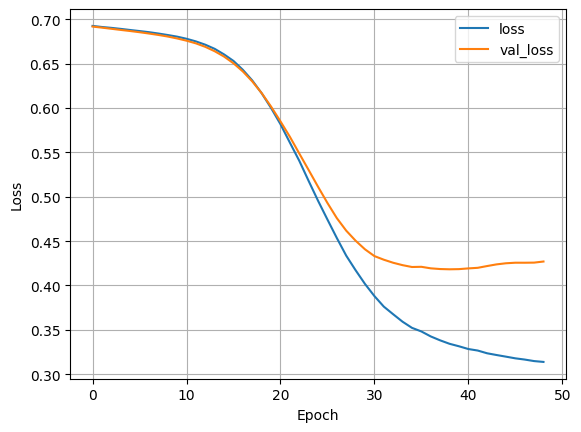

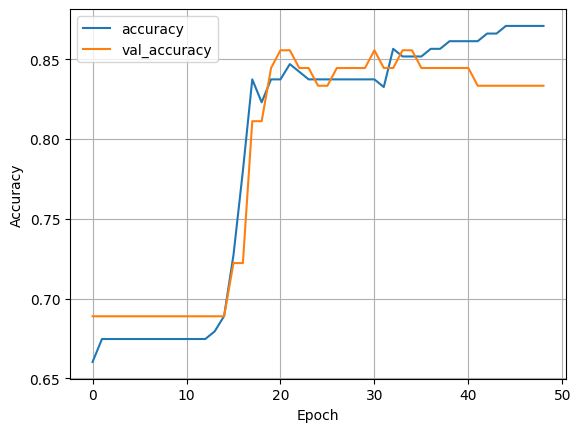

In [167]:
#Plot average loss and accuracy on separate plots
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
#Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.3)

3/3 [==============================] - 0s 1ms/step


Accuracy: 0.8222222222222222


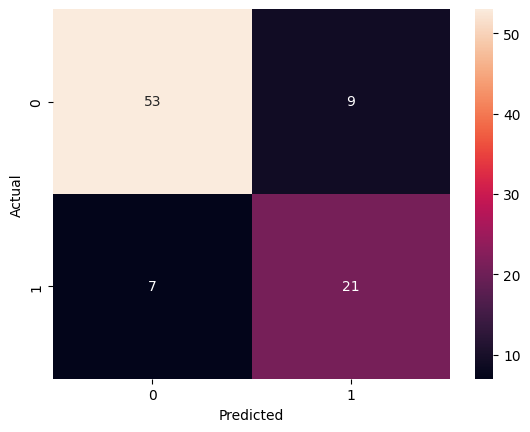

In [169]:
#Make the confusion matrix and print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#Vizualize the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot = True)
#Label the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
#Show the plot
plt.show()

In [170]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.70      0.75      0.72        28

    accuracy                           0.82        90
   macro avg       0.79      0.80      0.80        90
weighted avg       0.83      0.82      0.82        90



In [160]:
#Save the model
model.save('heart_failure_ANN.h5')